In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from Milestone4 import load_acronyms, load_reviews, replace_acronyms, test1, test2

In [2]:
acronym_expansion_map = load_acronyms('data/acronyms/slang.csv')
review_list = load_reviews('data/reviews')
test1_review_list = load_reviews('data/test1reviews')
test2_review_list = load_reviews('data/test2reviews')

In [3]:
modified_reviews, execution_time, test_result = test1(test1_review_list, acronym_expansion_map)
print(f"Original Reviews: {test1_review_list}")
print(f"Modified Reviews: {modified_reviews}")
print(f"Execution time: {execution_time:.3f}")
print(f"Test result: {test_result}")

Original Reviews: ['I will brb', 'smh gtg np', 'SMH GTG NP']
Modified Reviews: ['I will be right back', 'shaking my head got to go no problem', 'shaking my head got to go no problem']
Execution time: 0.000
Test result: Success


In [4]:
review_count, execution_time, test_result = test2(test2_review_list, acronym_expansion_map)
print(f"Review count: {review_count}")
print(f"Execution time: {execution_time:.3f}")
print(f"Test result: {test_result}")

Review count: 9163
Execution time: 0.076
Test result: Success


In [5]:
def measure_runtime(func, *args):
    start_time = time.time()
    func(*args)
    end_time = time.time()
    return end_time - start_time

In [6]:
input_sizes = [10, 50, 100, 500, 1000, 5000, 10000]

In [7]:
runtimes = []
expected_runtimes = []

In [8]:
for size in input_sizes:
    reviews = review_list[:size]
    runtime = measure_runtime(replace_acronyms, reviews, acronym_expansion_map)
    runtimes.append(runtime)
    expected_runtime = (size ** 2) * 0.0000001
    expected_runtimes.append(expected_runtime)

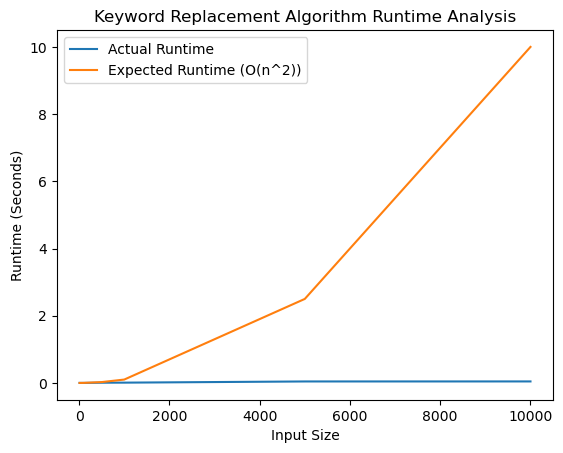

In [9]:
plt.plot(input_sizes, runtimes, label='Actual Runtime')
plt.plot(input_sizes, expected_runtimes, label='Expected Runtime (O(n^2))')
plt.xlabel('Input Size')
plt.ylabel('Runtime (Seconds)')
plt.title('Keyword Replacement Algorithm Runtime Analysis')
plt.legend()
plt.show()